## Training and evaluation of Classical ML methods (RF, SVM, Logistic Regression)

In [1]:
import pandas as pd
import numpy as np
import joblib as jbl
from sklearn.model_selection import PredefinedSplit
from scipy.sparse import vstack
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Loading or train/test data and multihot targets, we also want to get label names, so we extract them from columns in "preprocessed_df"

In [2]:
y_train = jbl.load("y_train.pkl")
y_test = jbl.load("y_test.pkl")
label_names = jbl.load("preprocessed_df.pkl").columns[3:-1]
print(label_names)
y_full = np.concatenate([y_train, y_test], axis = 0)
print(y_full.shape)

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'water', 'food', 'shelter', 'clothing', 'money', 'missing_people',
       'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport',
       'buildings', 'electricity', 'tools', 'hospitals', 'shops',
       'aid_centers', 'other_infrastructure', 'weather_related', 'floods',
       'storm', 'fire', 'earthquake', 'cold', 'other_weather',
       'direct_report'],
      dtype='object')
(26216, 35)


### Bag of word representations

In [3]:
bow_train = jbl.load("bow_train.pkl")
bow_test = jbl.load("bow_test.pkl")
bow_full = vstack([bow_train, bow_test])
print(bow_full.shape)

(26216, 6224)


### Tfidf representations

In [4]:
tfidf_train = jbl.load("tfidf_train.pkl")
tfidf_test = jbl.load("tfidf_test.pkl")
tfidf_full =  vstack([tfidf_train, tfidf_test])
print(tfidf_full.shape)

(26216, 6224)


### Sense vector representations

In [5]:
sense_train = jbl.load("sense_vectors_train.pkl")
sense_test = jbl.load("sense_vectors_test.pkl")
sense_full = np.concatenate([sense_train, sense_test], axis=0)
print(sense_full.shape)

(26216, 50)


### Predefined split for the GridSearch

In [6]:
test_fold = np.zeros(len(y_full))
test_fold[:len(y_train)] = -1
split = PredefinedSplit(test_fold)

## SVM
Using LinearSVC, it is Similar to SVC with parameter kernel='linear', but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

## Bow vectors

In [7]:
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__penalty': ["l2"]
}
mutli_svm = MultiOutputClassifier(LinearSVC(), n_jobs=-1)
clf = GridSearchCV(mutli_svm, param_grid=param_grid, scoring="f1_macro", cv = split, verbose=4, refit=False)
clf.fit(bow_full, y_full)
print(clf.best_params_)
mutli_svm_bow = mutli_svm.set_params(**clf.best_params_)
mutli_svm_bow.fit(bow_train, y_train)
preds = mutli_svm_bow.predict(bow_test)

Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV 1/1] END estimator__C=0.1, estimator__penalty=l2;, score=0.415 total time=   6.9s
[CV 1/1] END estimator__C=1, estimator__penalty=l2;, score=0.401 total time=  19.6s
[CV 1/1] END estimator__C=10, estimator__penalty=l2;, score=0.361 total time=  43.6s
{'estimator__C': 0.1, 'estimator__penalty': 'l2'}


In [8]:
def results(y_test, preds, labels):
    def plot_cms(y_test, preds, labels):
        plt.figure(figsize=(15,15))
        for i in range(len(labels)):
            plt.subplot(6,6,i+1)
            plt.title(f"{labels[i]}")
            cm = confusion_matrix(y_test[:, i], preds[:, i], normalize = "true")
            sns.heatmap(cm, annot=True, fmt=".2f", cbar=False, cmap="mako")
            plt.ylabel("True")
            plt.xlabel("Pred")
        plt.tight_layout()
        plt.suptitle("Per class confusion matrices, normilized by true (diagonal is recall)")
        plt.subplots_adjust(top=0.95)
        plt.show()
    plot_cms(y_test, preds, labels)
    cr = classification_report(y_test, preds, target_names=labels, zero_division=0)
    print(cr)

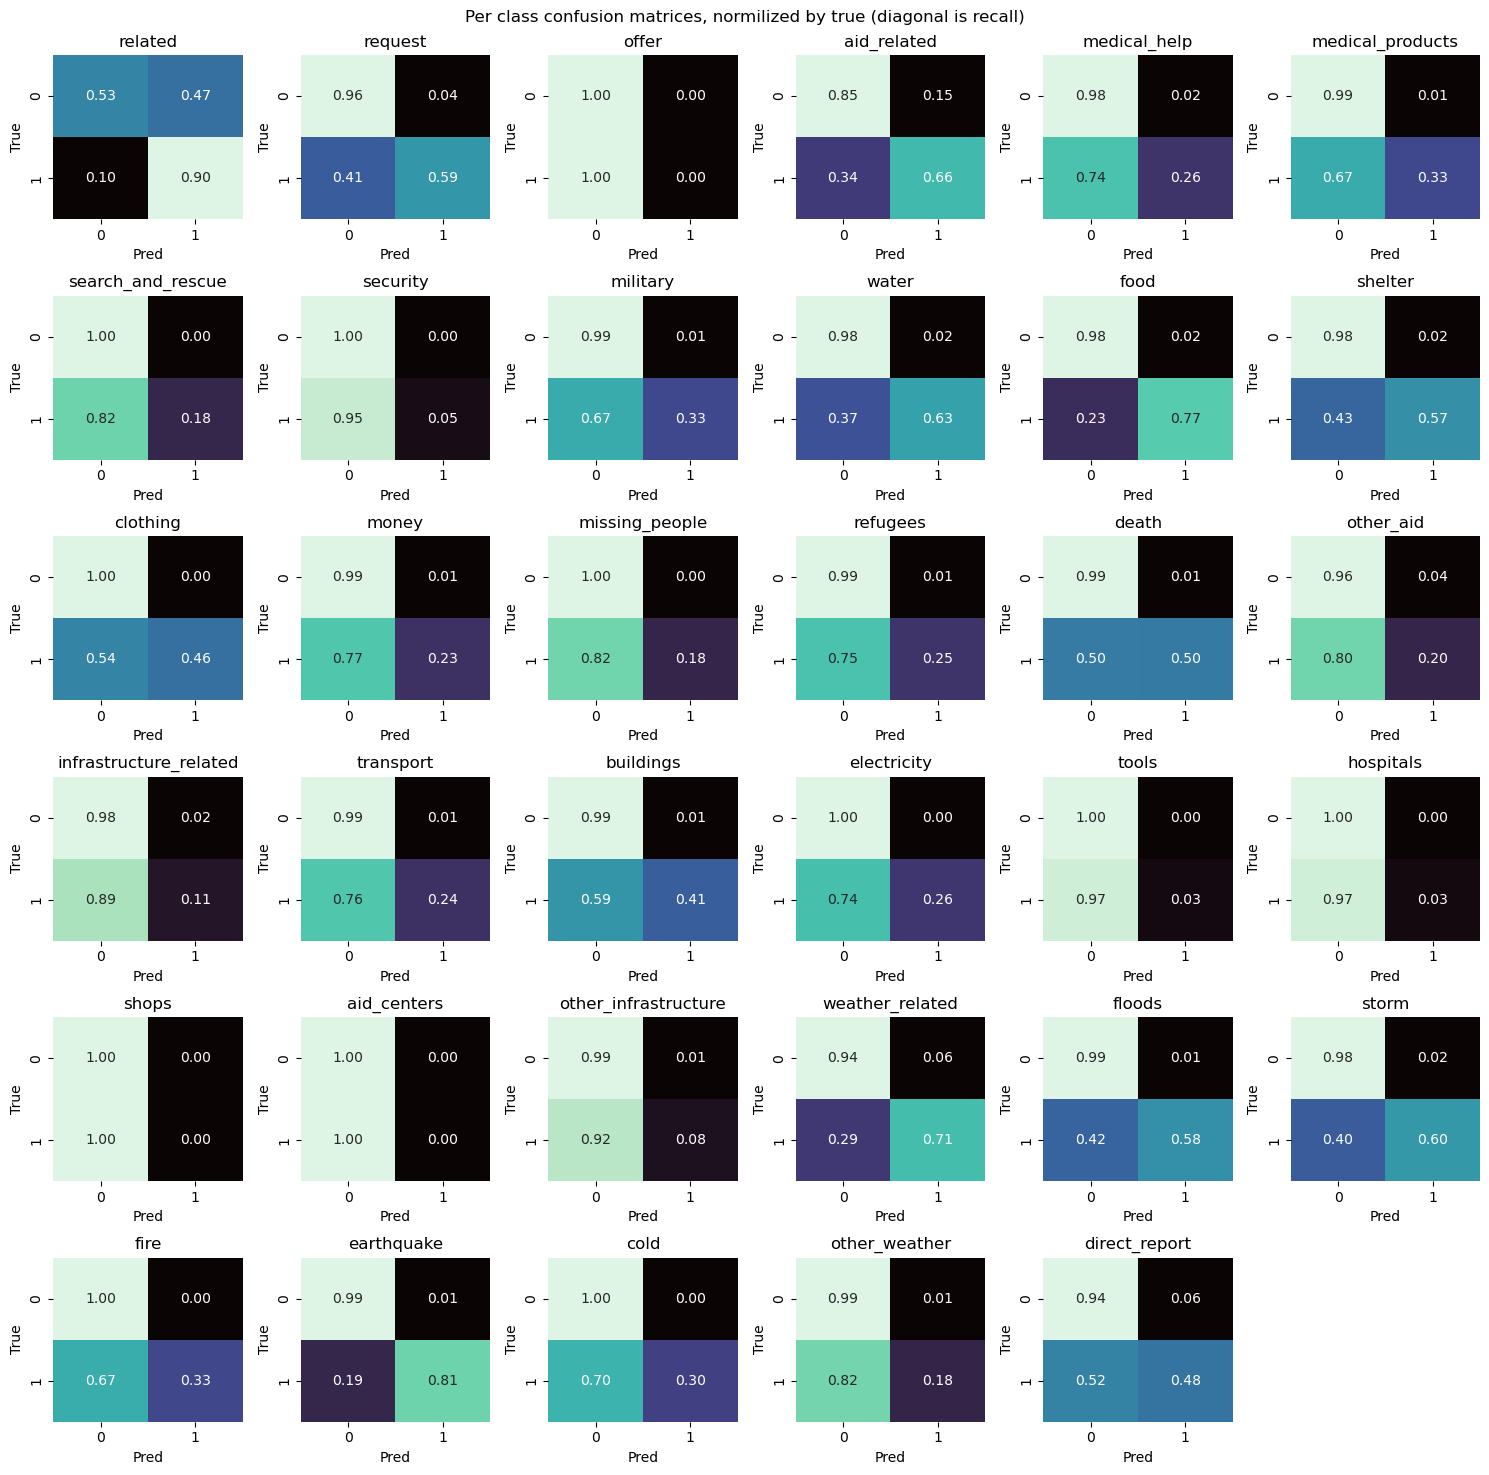

                        precision    recall  f1-score   support

               related       0.86      0.90      0.88      4018
               request       0.74      0.59      0.66       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.76      0.66      0.71      2232
          medical_help       0.54      0.26      0.35       438
      medical_products       0.63      0.33      0.43       265
     search_and_rescue       0.57      0.18      0.28       152
              security       0.44      0.05      0.09        82
              military       0.59      0.33      0.42       166
                 water       0.73      0.63      0.68       345
                  food       0.81      0.77      0.79       607
               shelter       0.76      0.57      0.65       465
              clothing       0.64      0.46      0.54        82
                 money       0.52      0.23      0.32       120
        missing_people       0.69      

In [9]:
results(y_test, preds, label_names)

## TF-IDF vectors

Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV 1/1] END estimator__C=0.1, estimator__penalty=l2;, score=0.308 total time=   1.3s
[CV 1/1] END estimator__C=1, estimator__penalty=l2;, score=0.409 total time=   1.7s
[CV 1/1] END estimator__C=10, estimator__penalty=l2;, score=0.388 total time=   2.7s
{'estimator__C': 1, 'estimator__penalty': 'l2'}


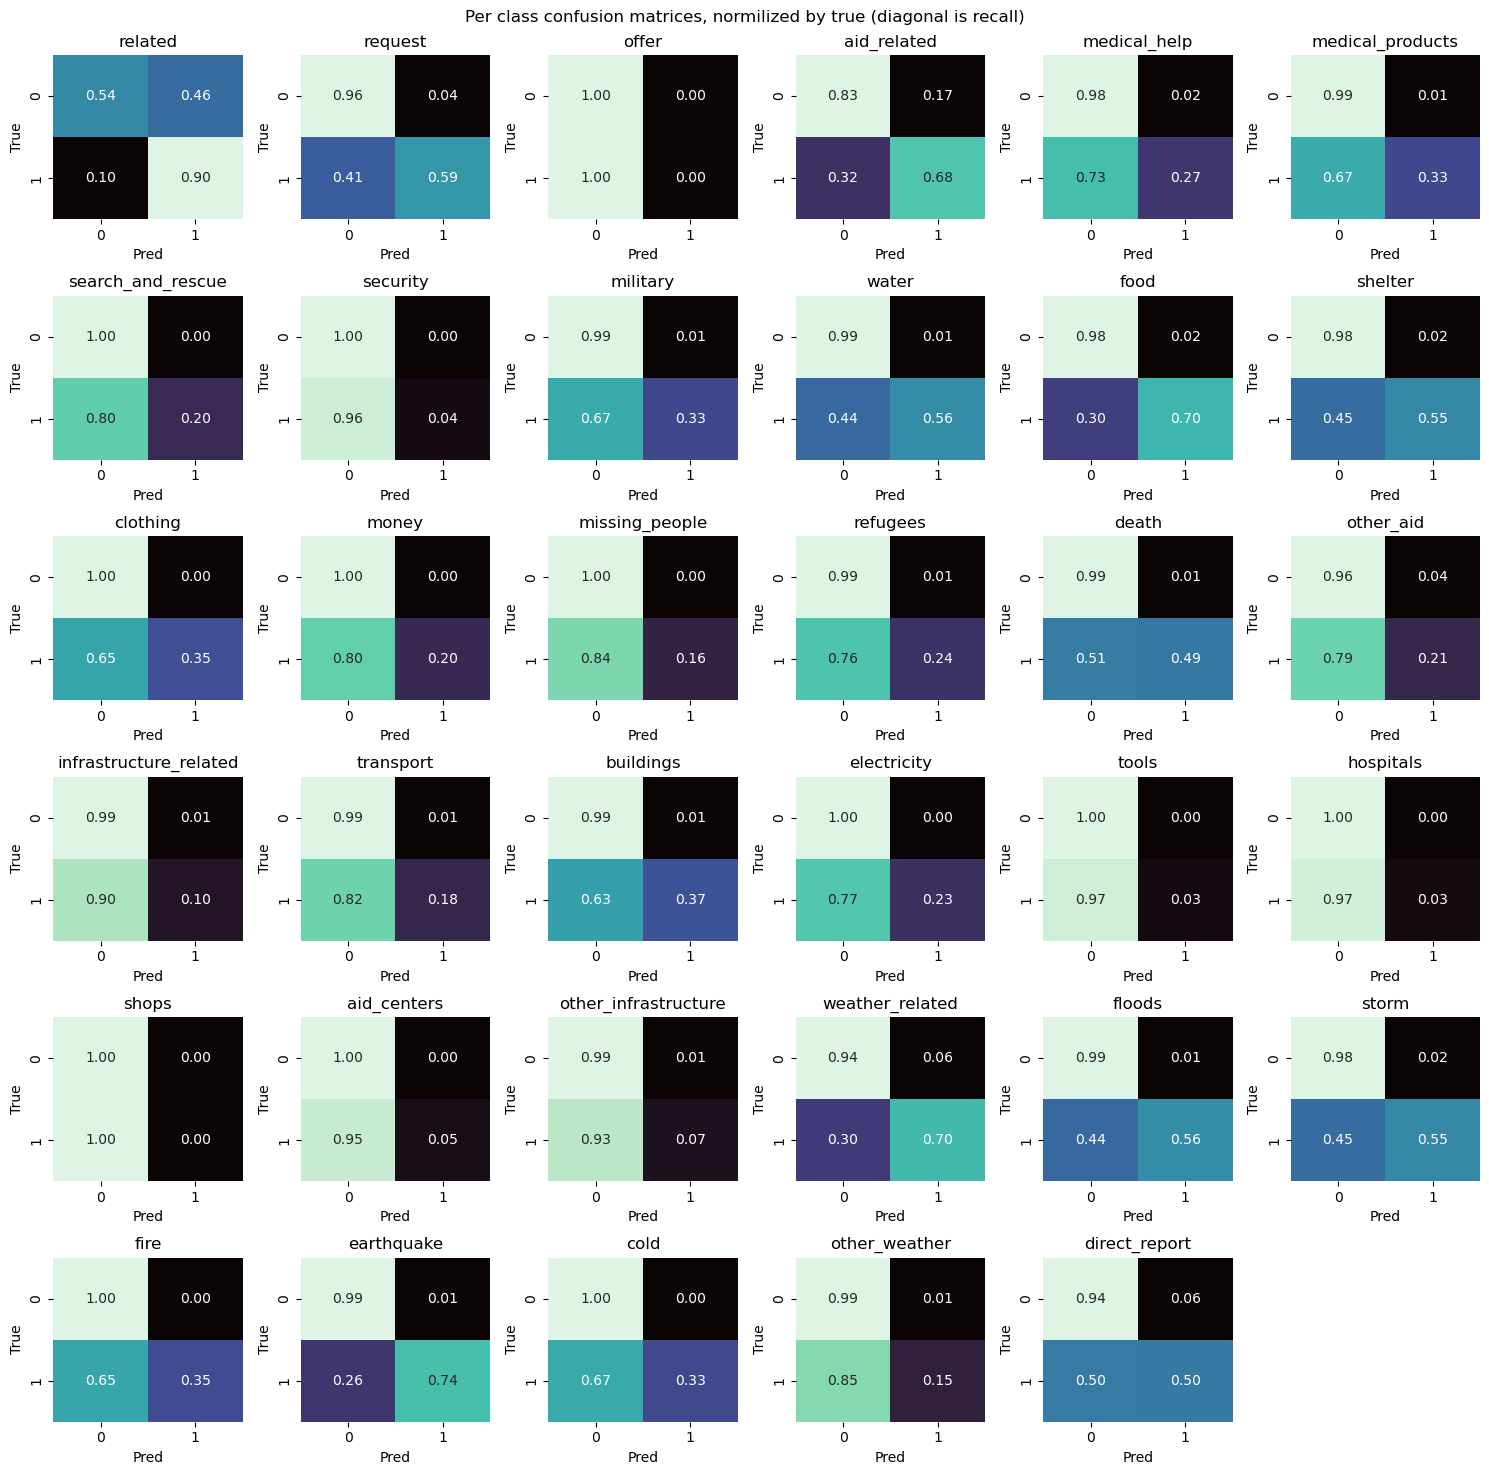

                        precision    recall  f1-score   support

               related       0.87      0.90      0.88      4018
               request       0.76      0.59      0.67       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.75      0.68      0.71      2232
          medical_help       0.58      0.27      0.37       438
      medical_products       0.67      0.33      0.44       265
     search_and_rescue       0.67      0.20      0.31       152
              security       0.43      0.04      0.07        82
              military       0.62      0.33      0.43       166
                 water       0.75      0.56      0.64       345
                  food       0.81      0.70      0.75       607
               shelter       0.75      0.55      0.63       465
              clothing       0.63      0.35      0.45        82
                 money       0.69      0.20      0.31       120
        missing_people       0.56      

In [10]:
clf.fit(tfidf_full, y_full)
print(clf.best_params_)
mutli_svm_tfidf = mutli_svm.set_params(**clf.best_params_)
mutli_svm_tfidf.fit(tfidf_train, y_train)
preds = mutli_svm.predict(tfidf_test)
results(y_test, preds, label_names)

## Sense vectors

Fitting 1 folds for each of 3 candidates, totalling 3 fits
[CV 1/1] END estimator__C=0.1, estimator__penalty=l2;, score=0.200 total time=   3.1s
[CV 1/1] END estimator__C=1, estimator__penalty=l2;, score=0.226 total time=   3.6s
[CV 1/1] END estimator__C=10, estimator__penalty=l2;, score=0.231 total time=   3.5s
{'estimator__C': 10, 'estimator__penalty': 'l2'}


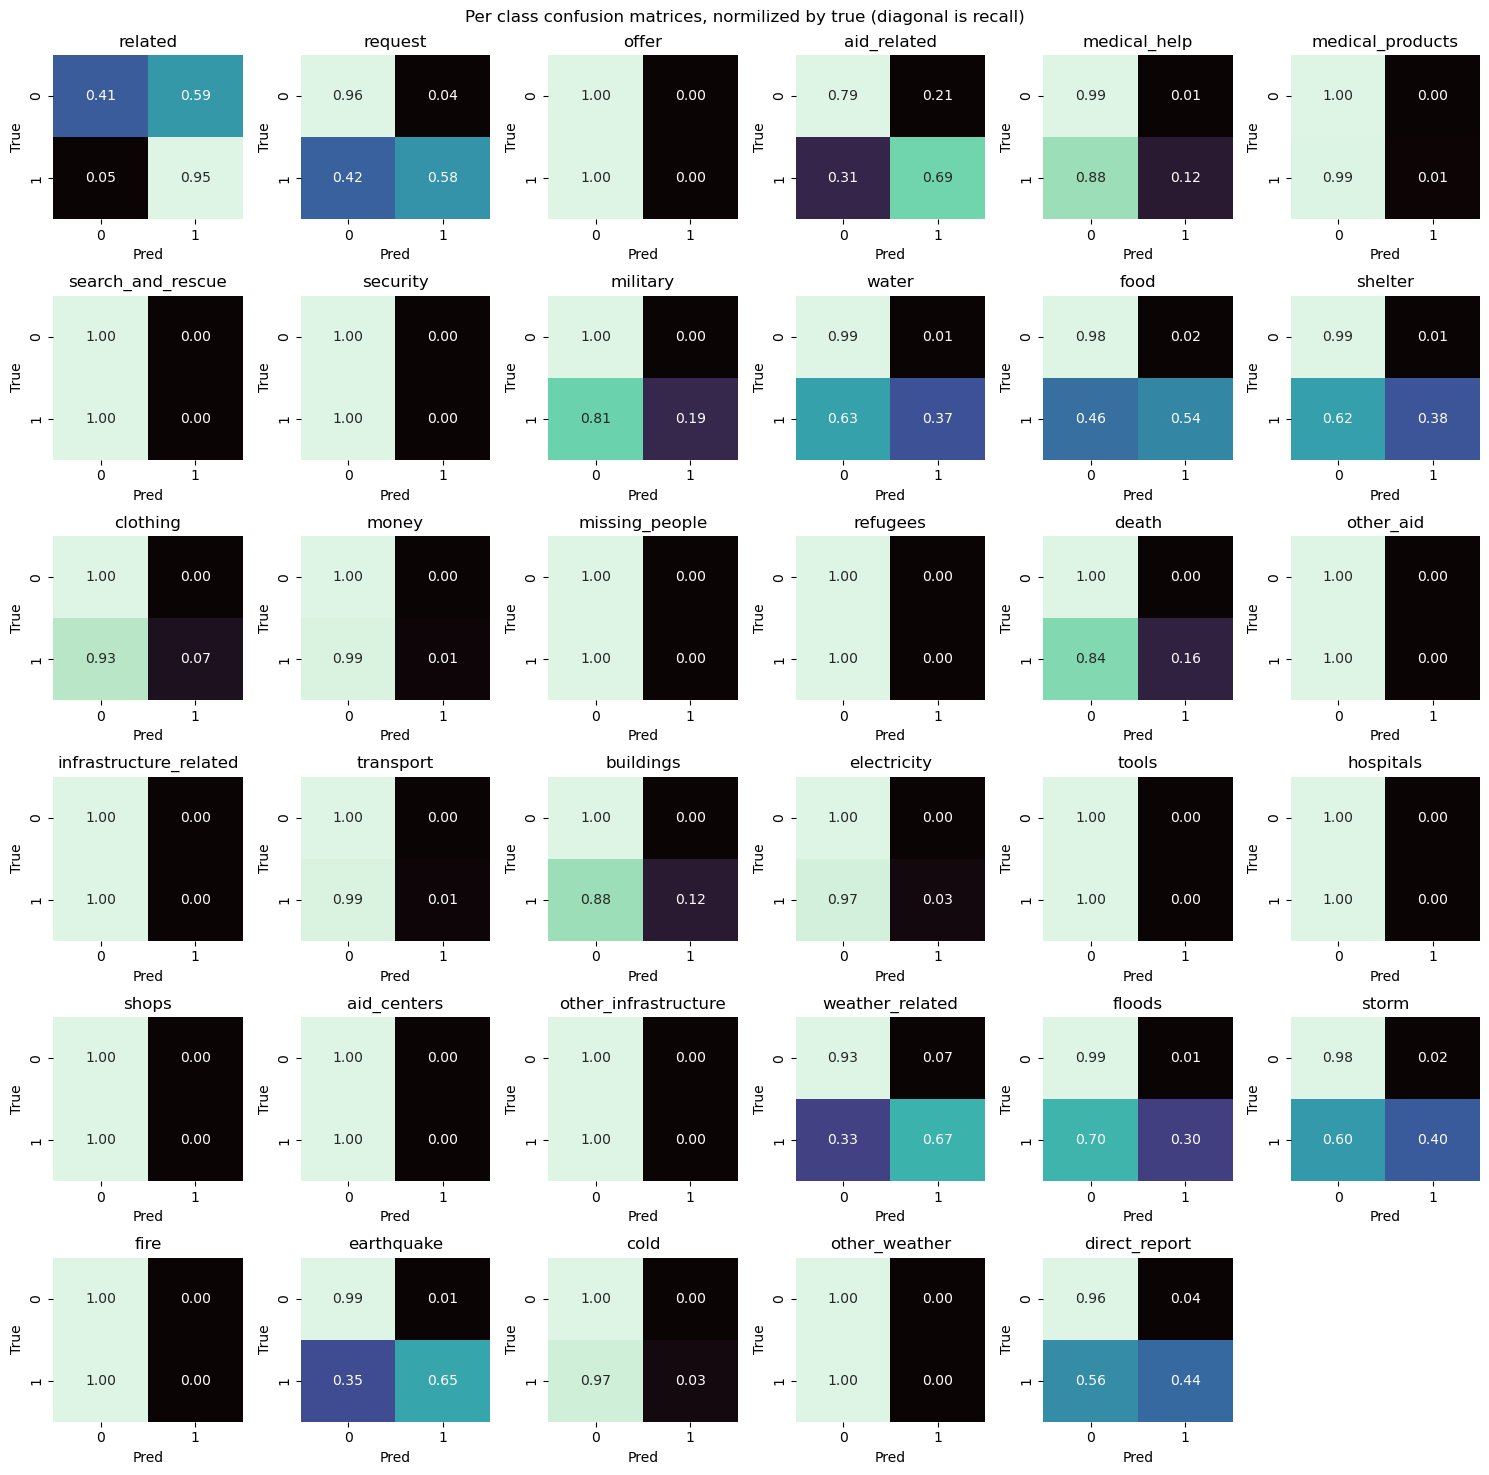

                        precision    recall  f1-score   support

               related       0.84      0.95      0.89      4018
               request       0.78      0.58      0.67       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.71      0.69      0.70      2232
          medical_help       0.59      0.12      0.20       438
      medical_products       0.67      0.01      0.01       265
     search_and_rescue       0.00      0.00      0.00       152
              security       0.00      0.00      0.00        82
              military       0.61      0.19      0.29       166
                 water       0.75      0.37      0.49       345
                  food       0.79      0.54      0.64       607
               shelter       0.72      0.38      0.50       465
              clothing       0.75      0.07      0.13        82
                 money       0.33      0.01      0.02       120
        missing_people       0.00      

In [11]:
clf.fit(sense_full, y_full)
print(clf.best_params_)
mutli_svm_tfidf = mutli_svm.set_params(**clf.best_params_)
mutli_svm_tfidf.fit(sense_train, y_train)
preds = mutli_svm.predict(sense_test)
results(y_test, preds, label_names)

## Logistic Regression

### BOW

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV 1/1] END estimator__C=0.01, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.195 total time=   0.6s
[CV 1/1] END estimator__C=0.1, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.337 total time=   0.8s
[CV 1/1] END estimator__C=1, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.414 total time=   1.5s
[CV 1/1] END estimator__C=10, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.414 total time=   1.7s
{'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


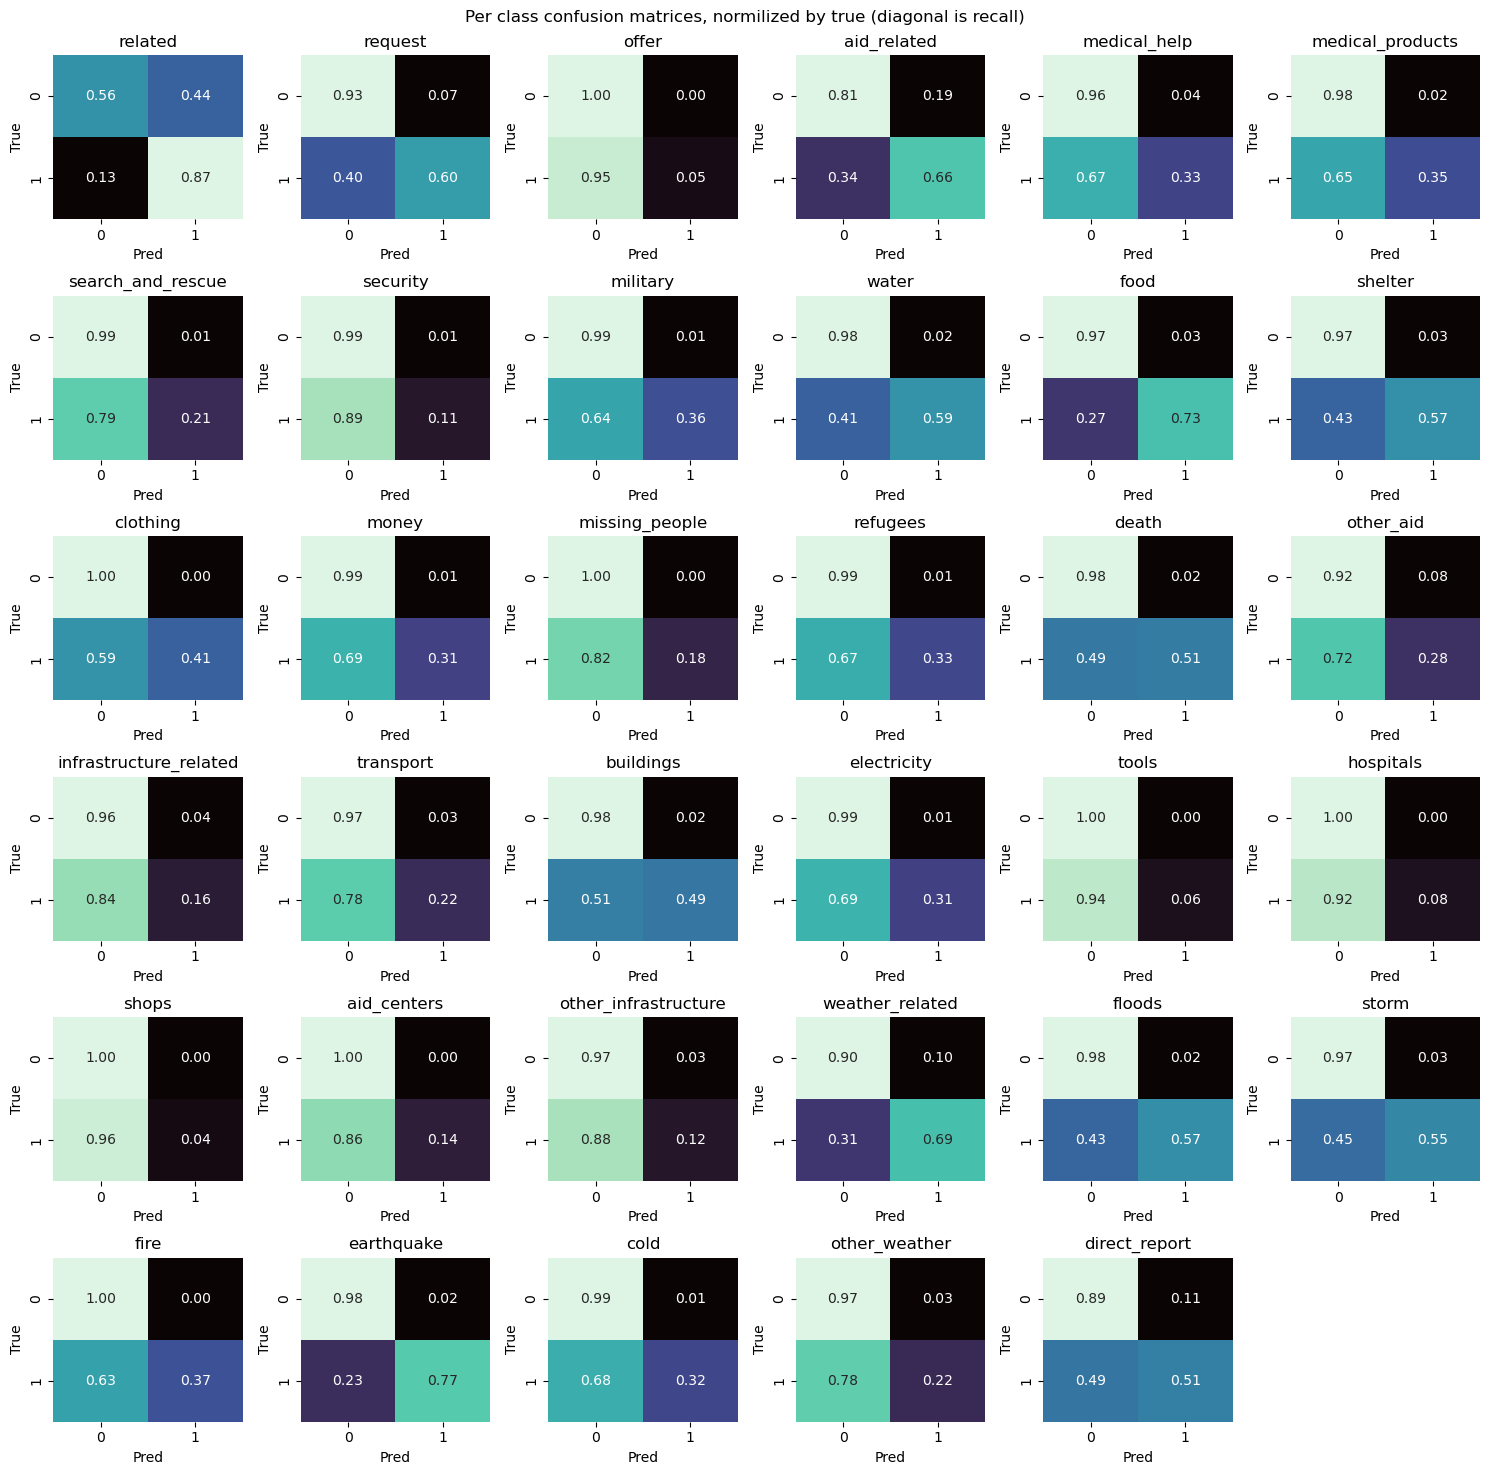

                        precision    recall  f1-score   support

               related       0.87      0.87      0.87      4018
               request       0.64      0.60      0.62       911
                 offer       0.12      0.05      0.07        21
           aid_related       0.72      0.66      0.69      2232
          medical_help       0.41      0.33      0.36       438
      medical_products       0.45      0.35      0.40       265
     search_and_rescue       0.34      0.21      0.26       152
              security       0.22      0.11      0.15        82
              military       0.52      0.36      0.42       166
                 water       0.69      0.59      0.63       345
                  food       0.73      0.73      0.73       607
               shelter       0.64      0.57      0.61       465
              clothing       0.62      0.41      0.50        82
                 money       0.50      0.31      0.38       120
        missing_people       0.42      

In [12]:
from sklearn.linear_model import LogisticRegression
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__penalty': ['l2'],
    'estimator__solver': ['lbfgs'], #lbfgs handles multiclass and is fast
}
mutli_logistic = MultiOutputClassifier(LogisticRegression(), n_jobs=-1)
clf = GridSearchCV(mutli_logistic, param_grid=param_grid, scoring="f1_macro", cv = split, verbose=4, refit=False)
clf.fit(bow_full, y_full)
print(clf.best_params_)
mutli_logistic_bow = mutli_logistic.set_params(**clf.best_params_)
mutli_logistic_bow.fit(bow_train, y_train)
preds = mutli_logistic_bow.predict(bow_test)
results(y_test, preds, label_names)

## TF-IDF

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV 1/1] END estimator__C=0.01, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.033 total time=   1.5s
[CV 1/1] END estimator__C=0.1, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.132 total time=   1.6s
[CV 1/1] END estimator__C=1, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.304 total time=   1.9s
[CV 1/1] END estimator__C=10, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.403 total time=   2.3s
{'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


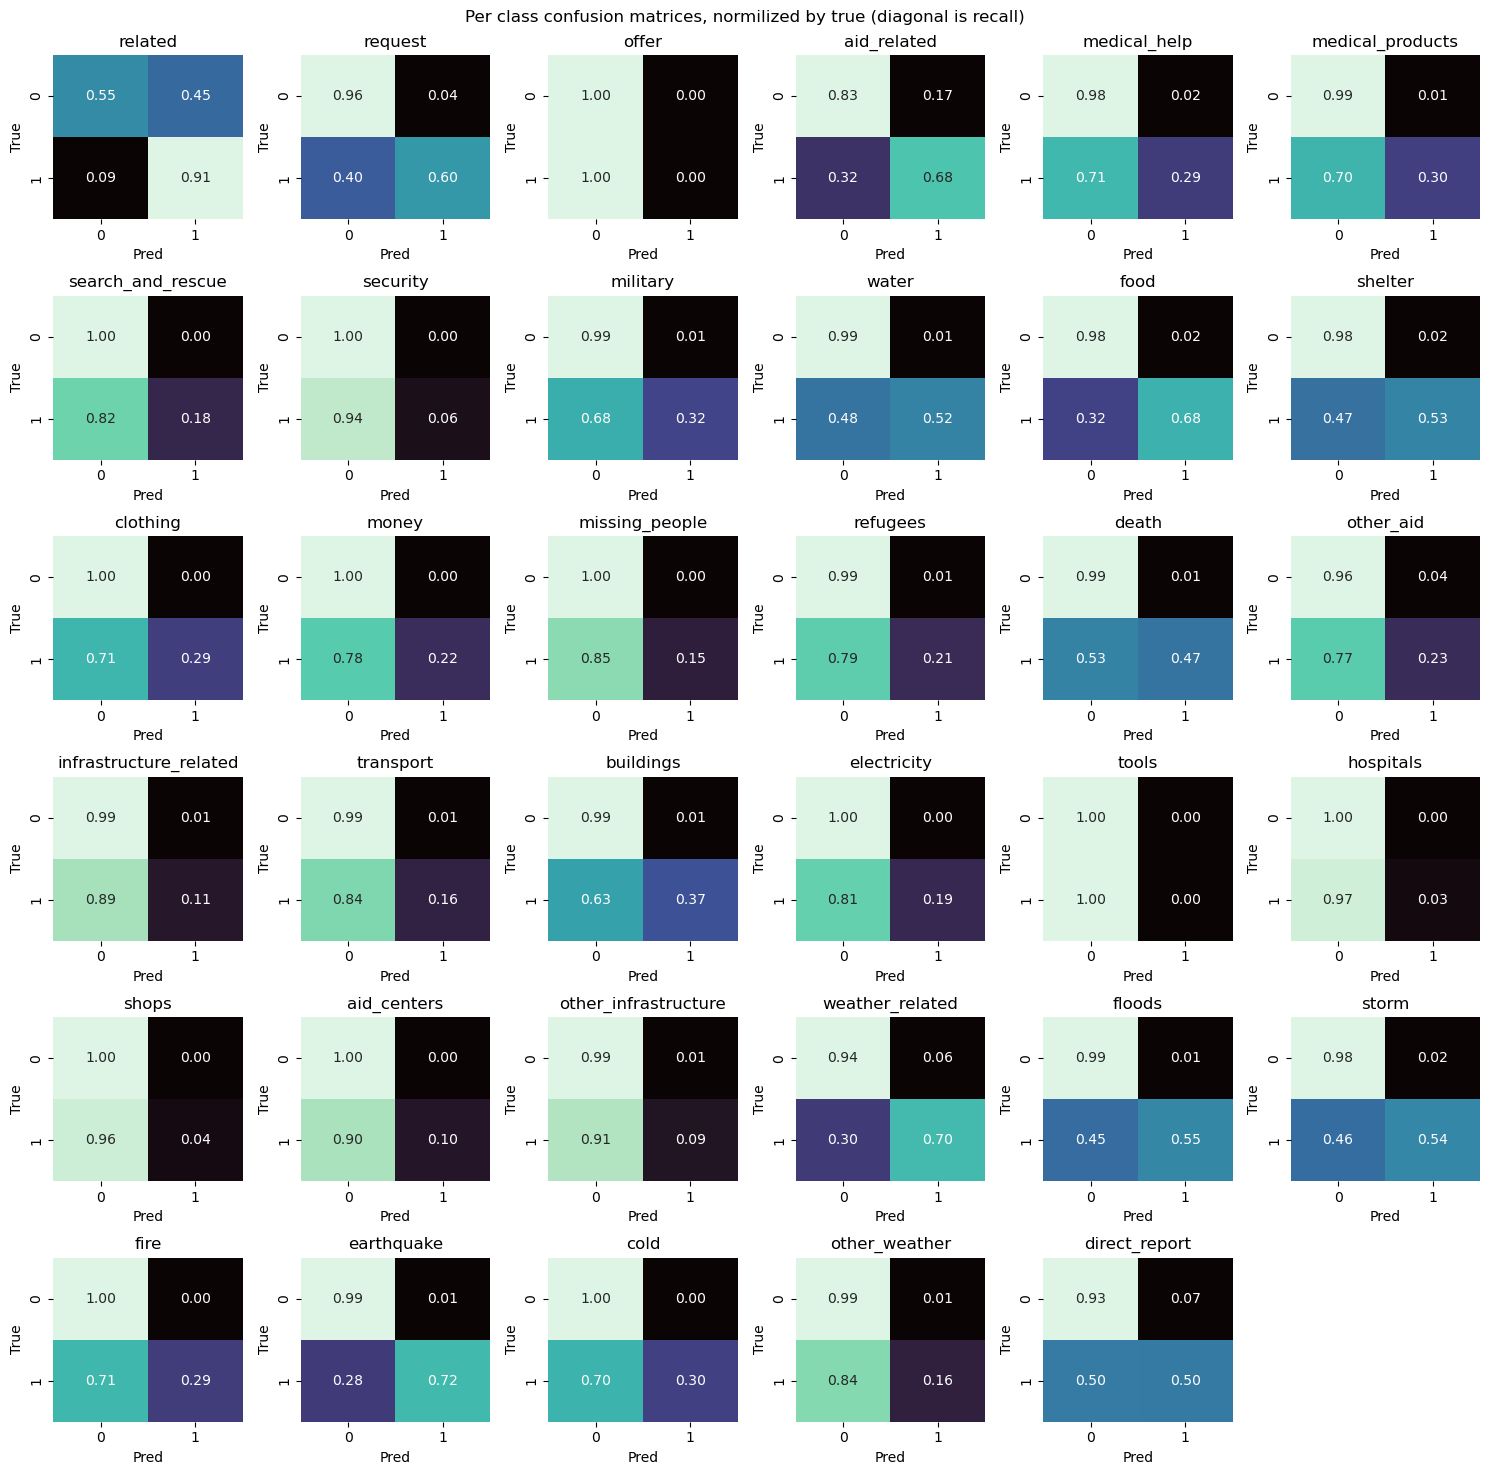

                        precision    recall  f1-score   support

               related       0.87      0.91      0.89      4018
               request       0.77      0.60      0.67       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.75      0.68      0.71      2232
          medical_help       0.59      0.29      0.39       438
      medical_products       0.63      0.30      0.41       265
     search_and_rescue       0.61      0.18      0.28       152
              security       0.45      0.06      0.11        82
              military       0.65      0.32      0.43       166
                 water       0.74      0.52      0.61       345
                  food       0.82      0.68      0.75       607
               shelter       0.74      0.53      0.62       465
              clothing       0.57      0.29      0.39        82
                 money       0.74      0.22      0.34       120
        missing_people       0.56      

In [13]:
clf.fit(tfidf_full, y_full)
print(clf.best_params_)
mutli_logistic_tfidf = mutli_logistic.set_params(**clf.best_params_)
mutli_logistic_tfidf.fit(tfidf_train, y_train)
preds = mutli_logistic_tfidf.predict(tfidf_test)
results(y_test, preds, label_names)

## Sense vectors

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV 1/1] END estimator__C=0.01, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.065 total time=   1.6s
[CV 1/1] END estimator__C=0.1, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.161 total time=   1.8s
[CV 1/1] END estimator__C=1, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.258 total time=   2.0s
[CV 1/1] END estimator__C=10, estimator__penalty=l2, estimator__solver=lbfgs;, score=0.298 total time=   2.0s
{'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}


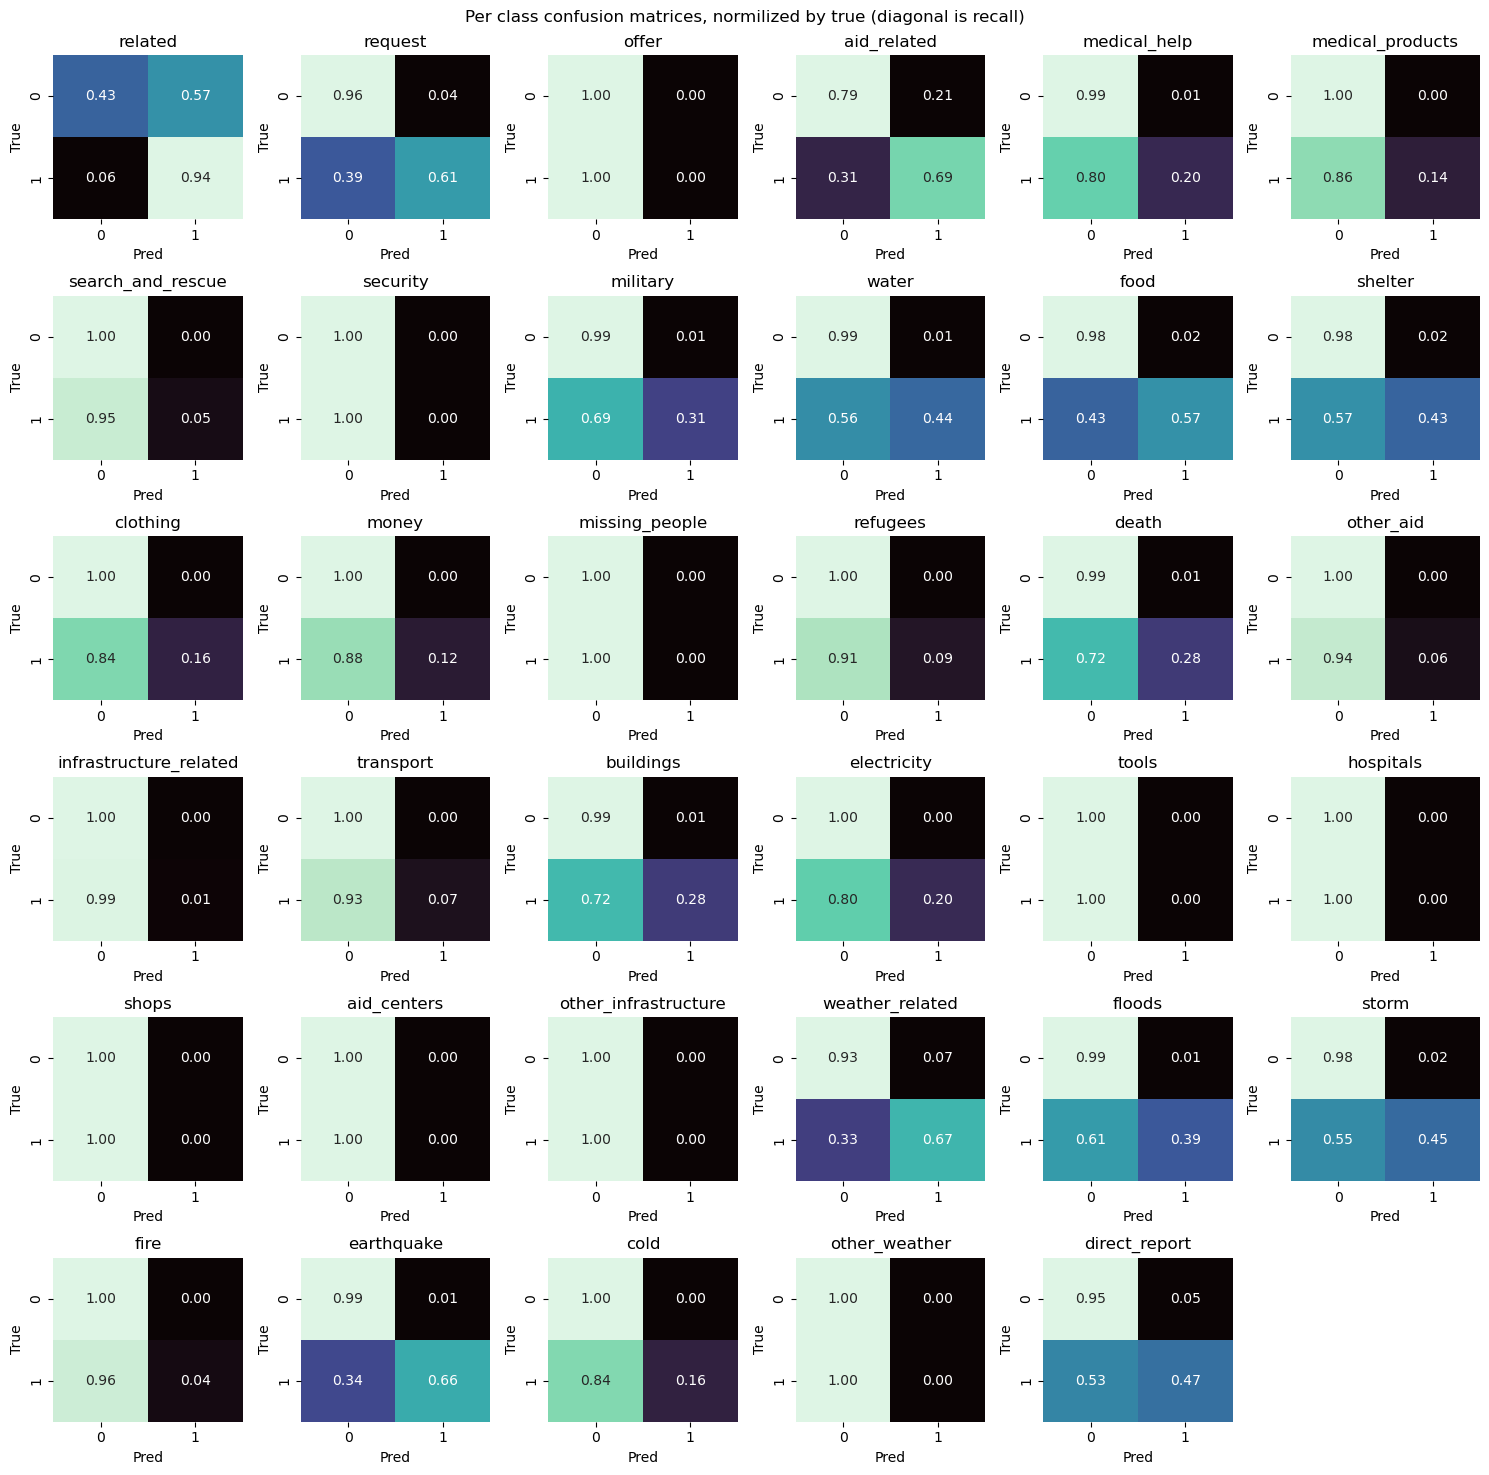

                        precision    recall  f1-score   support

               related       0.84      0.94      0.89      4018
               request       0.77      0.61      0.68       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.71      0.69      0.70      2232
          medical_help       0.56      0.20      0.30       438
      medical_products       0.66      0.14      0.24       265
     search_and_rescue       0.70      0.05      0.09       152
              security       0.00      0.00      0.00        82
              military       0.61      0.31      0.41       166
                 water       0.73      0.44      0.55       345
                  food       0.76      0.57      0.66       607
               shelter       0.70      0.43      0.53       465
              clothing       0.57      0.16      0.25        82
                 money       0.58      0.12      0.21       120
        missing_people       0.00      

In [14]:
clf.fit(sense_full, y_full)
print(clf.best_params_)
mutli_logistic_sense = mutli_logistic.set_params(**clf.best_params_)
mutli_logistic_sense.fit(sense_train, y_train)
preds = mutli_logistic_sense.predict(sense_test)
results(y_test, preds, label_names)

## Random Forest

### BOW

Fitting 1 folds for each of 12 candidates, totalling 12 fits
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.256 total time=  39.7s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.253 total time=  56.9s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.251 total time=  38.4s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.253 total time=  57.5s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.254 total time=  40.7s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.255 total time=  59.4s
[CV 1/1] END class_

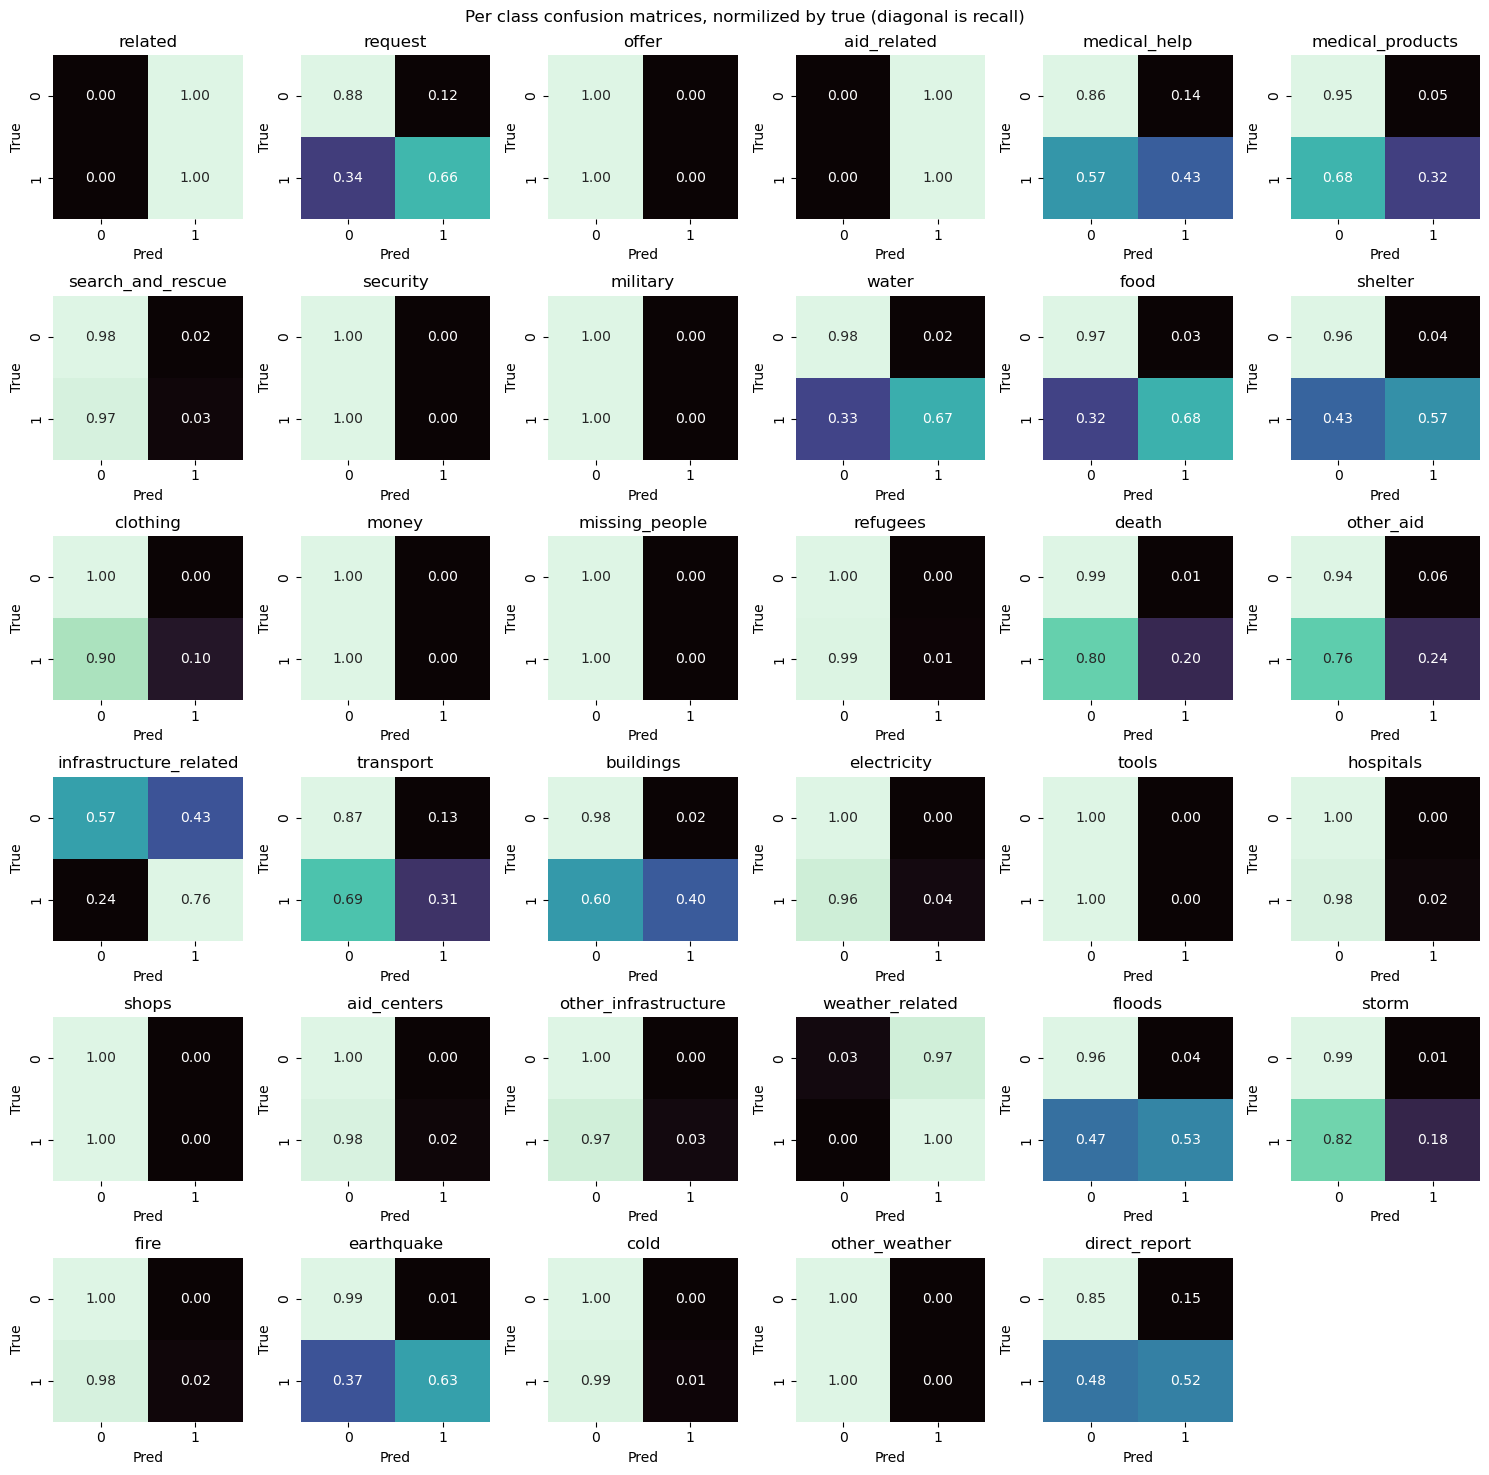

                        precision    recall  f1-score   support

               related       0.77      1.00      0.87      4018
               request       0.54      0.66      0.60       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.43      1.00      0.60      2232
          medical_help       0.22      0.43      0.29       438
      medical_products       0.24      0.32      0.27       265
     search_and_rescue       0.06      0.03      0.04       152
              security       0.00      0.00      0.00        82
              military       0.00      0.00      0.00       166
                 water       0.66      0.67      0.66       345
                  food       0.77      0.68      0.72       607
               shelter       0.59      0.57      0.58       465
              clothing       0.67      0.10      0.17        82
                 money       0.00      0.00      0.00       120
        missing_people       0.00      

In [15]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    "n_estimators": [200, 300], #500
    "criterion": ["gini"],
  #  "max_depth": [None, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [2, 5],
    "class_weight": ["balanced_subsample"]
}
rf = RandomForestClassifier(n_jobs=-1,)
clf = GridSearchCV(rf, param_grid=param_grid, scoring="f1_macro", cv = split, verbose=4, refit=False)
clf.fit(bow_full, y_full)
print(clf.best_params_)
rf_bow = rf.set_params(**clf.best_params_)
rf_bow.fit(bow_train, y_train)
preds = rf_bow.predict(bow_test)
results(y_test, preds, label_names)

### TF-IDF

Fitting 1 folds for each of 12 candidates, totalling 12 fits
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.248 total time=  44.1s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.251 total time= 1.1min
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.251 total time=  46.3s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.247 total time= 1.1min
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.252 total time=  43.8s
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.250 total time= 1.2min
[CV 1/1] END class_

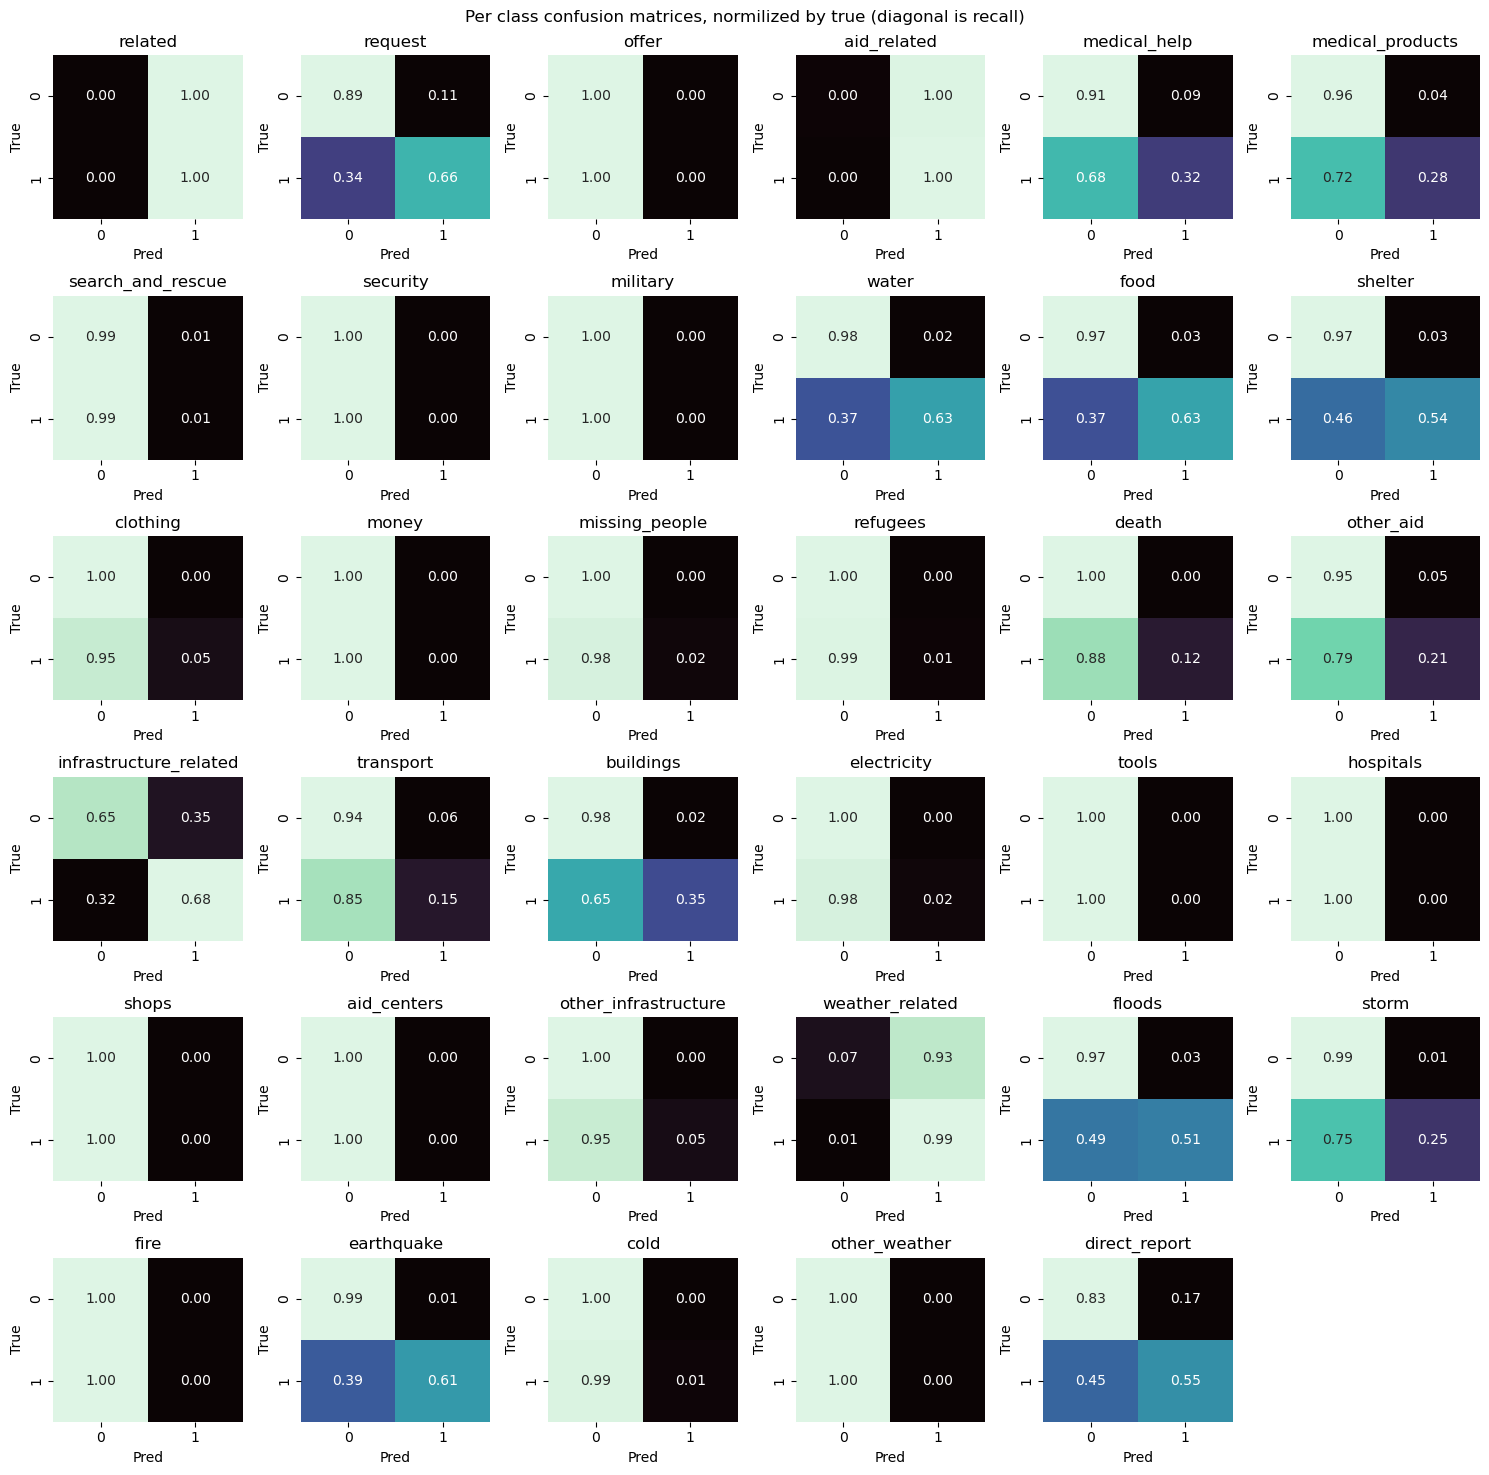

                        precision    recall  f1-score   support

               related       0.77      1.00      0.87      4018
               request       0.56      0.66      0.60       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.43      1.00      0.60      2232
          medical_help       0.25      0.32      0.28       438
      medical_products       0.28      0.28      0.28       265
     search_and_rescue       0.03      0.01      0.01       152
              security       0.00      0.00      0.00        82
              military       0.00      0.00      0.00       166
                 water       0.67      0.63      0.65       345
                  food       0.77      0.63      0.69       607
               shelter       0.61      0.54      0.58       465
              clothing       0.50      0.05      0.09        82
                 money       0.00      0.00      0.00       120
        missing_people       0.50      

In [16]:
clf.fit(tfidf_full, y_full)
print(clf.best_params_)
rf_tfidf = rf.set_params(**clf.best_params_)
rf_tfidf.fit(tfidf_train, y_train)
preds = rf_tfidf.predict(tfidf_test)
results(y_test, preds, label_names)

### Sense vectors

Fitting 1 folds for each of 12 candidates, totalling 12 fits
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.226 total time= 1.1min
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.226 total time= 1.7min
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.230 total time= 1.1min
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.230 total time= 1.6min
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.252 total time= 1.1min
[CV 1/1] END class_weight=balanced_subsample, criterion=gini, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.251 total time= 1.6min
[CV 1/1] END class_

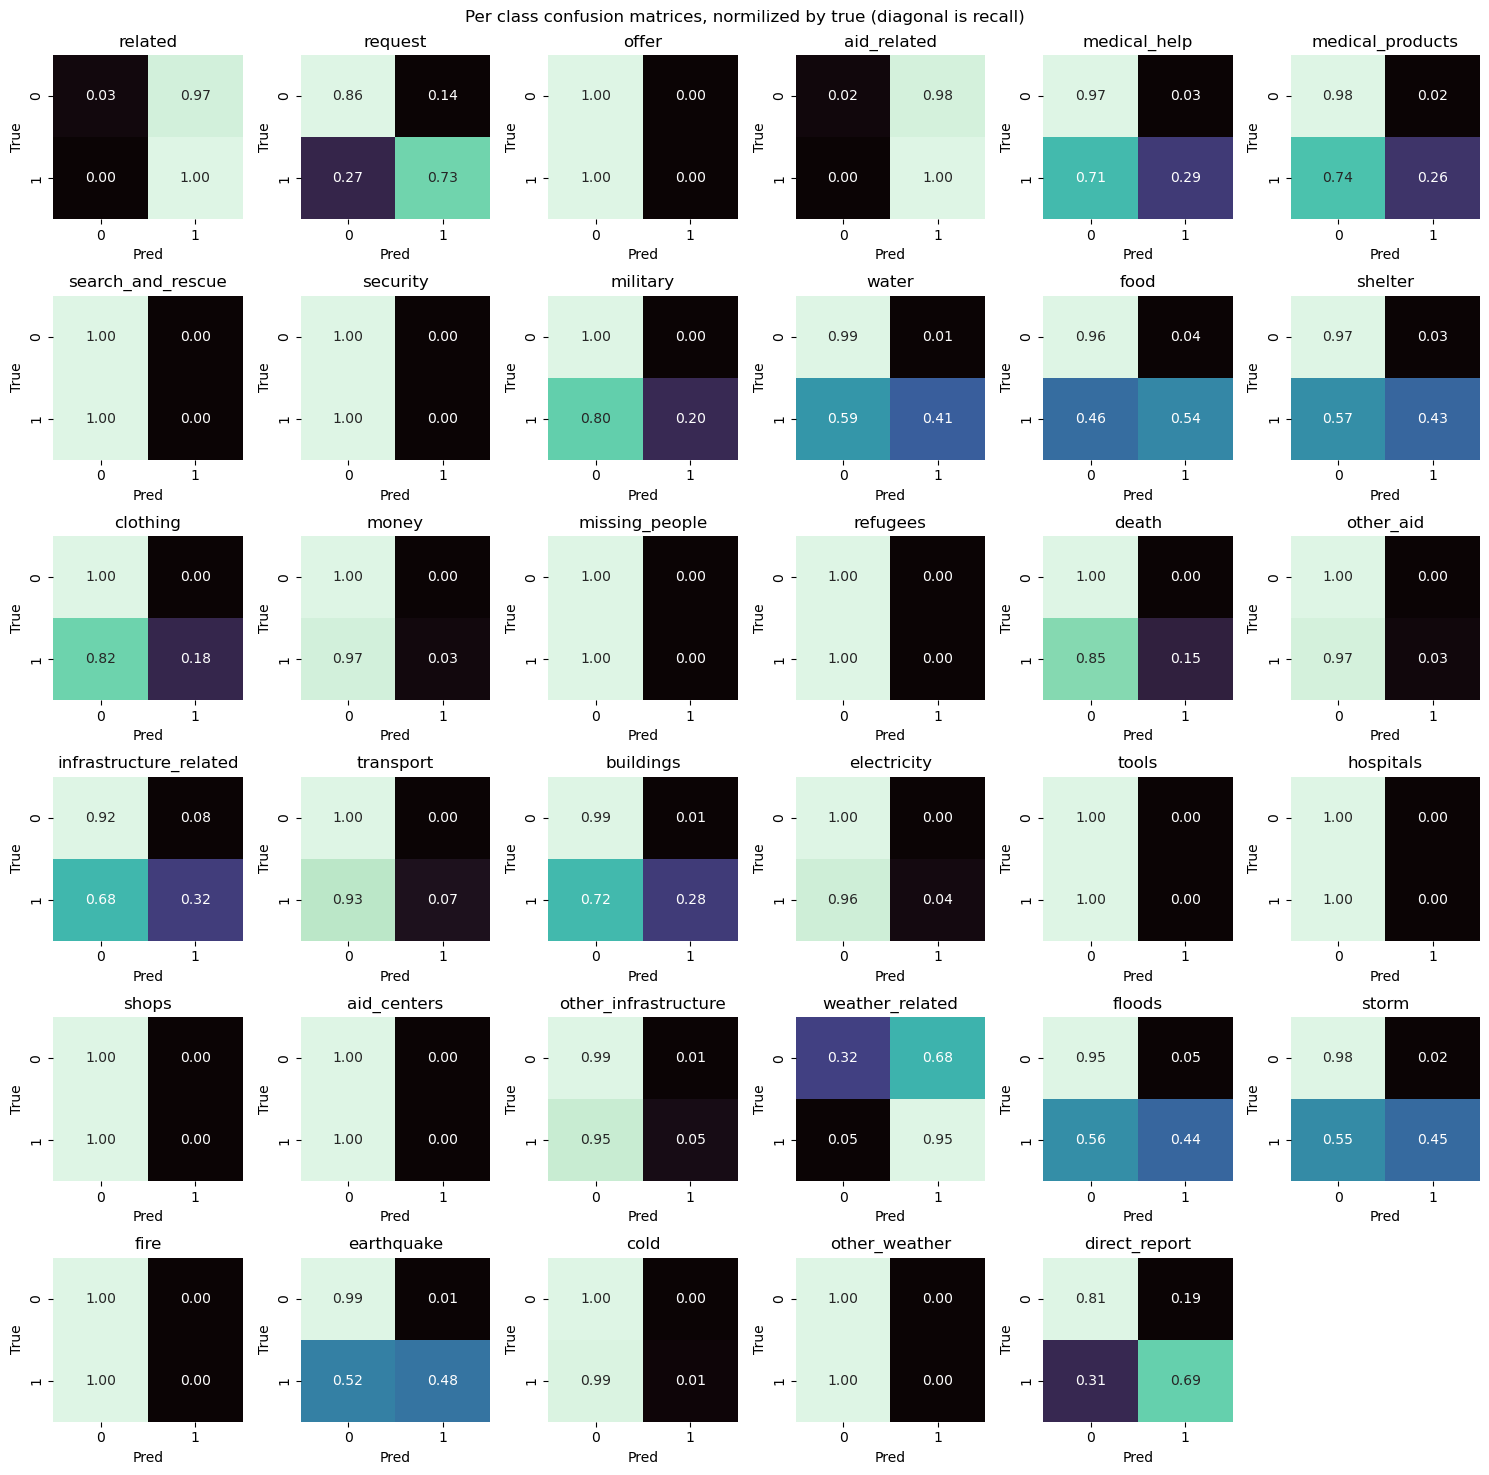

                        precision    recall  f1-score   support

               related       0.77      1.00      0.87      4018
               request       0.53      0.73      0.61       911
                 offer       0.00      0.00      0.00        21
           aid_related       0.43      1.00      0.60      2232
          medical_help       0.47      0.29      0.36       438
      medical_products       0.42      0.26      0.32       265
     search_and_rescue       0.00      0.00      0.00       152
              security       0.00      0.00      0.00        82
              military       0.60      0.20      0.30       166
                 water       0.69      0.41      0.51       345
                  food       0.65      0.54      0.59       607
               shelter       0.61      0.43      0.51       465
              clothing       0.44      0.18      0.26        82
                 money       0.75      0.03      0.05       120
        missing_people       0.00      

In [17]:
clf.fit(sense_full, y_full)
print(clf.best_params_)
rf_sense = rf.set_params(**clf.best_params_)
rf_sense.fit(sense_train, y_train)
preds = rf_sense.predict(sense_test)
results(y_test, preds, label_names)

Among the tested approaches, linear models Logistic Regression and Linear SVM classifier performed the best, achieving macro-F1 scores around 0.40–0.45 and weighted F1 scores of approximately 0.60–0.65, showing good performance across both frequent and infrequent categories. On the other hand, Random Forest performed poorly (macro-F1 0.10–0.20), since tree-based methods struggle with high-dimensional sparse text representations and tend to overfit or under-split. Overall, linear classifiers proved to be the most effective and computationally efficient choice, having good generalization and interpretable results, while ensemble method Random Forest failed to capture meaningful structure from sparse textual data. Additionally, the use of TF-IDF features led to slight performance improvements over raw bag-of-words counts, as TF-IDF weighting better emphasizes informative tokens while weighting down common words, sense vector embeddings showed bad result, presumably due to strong "compression" of overall message structure, and emphasis of specific words on the correct category.